# Análisis macroeconómico global 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

### Carga y limpieza de datos

In [2]:
#Cargamos el archivo CSV
df = pd.read_csv('global_data.csv')
df

,Country Name,Country Code,Series Name,Series Code,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,United States,USA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2.11783009919846,2.52381981441982,2.94555045455233,1.81945147474293,2.45762230356996,2.96650507100425,2.46703756313913,-2.21346933290643,5.8002061284573,1.93549589483209,2.54270029878489
1,United States,USA,GDP (current US$),NY.GDP.MKTP.CD,16880683000000,17608138000000,18295019000000,18804913000000,19612102000000,20656516000000,21521395000000,21322950000000,23594031000000,25744108000000,27360935000000
2,United States,USA,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,54844.2425797154,55817.5632471958,57040.2082136605,57658.6708825722,58703.1440782154,60127.2102775233,61330.6459767318,59394.778327105,62741.0018131151,63720.7641611959,65020.3529285737
3,United States,USA,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,53860,55670,56510,57060,59130,63360,66200,64690,71330,76590,80300
4,United States,USA,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1.46483265562717,1.62222297740817,0.118627135552451,1.26158320570536,2.13011000365961,2.44258329692817,1.81221007526021,1.23358439630629,4.69785886363742,8.00279982052121,4.11633838374488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Limpieza de datos

#Eliminamos las últimas 5 filas
df = df.iloc[:-5]

#Renombramos las columnas para eliminar '[YRaño]' de los nombres
df.columns = df.columns.str.replace(' [YR[0-9]{4}]', '', regex=True)

#Convertimos los datos de formato ancho a formato largo para hacer el análisis mas sencillo y óptimo
df = df.melt(id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'], var_name='Year', value_name='Value')

#Limpiar la columana Year para extraer solo el número del año
df['Year'] = df['Year'].str.extract(r'(\d{4})')

#Convertimos la columna 'Year' a entero 
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

#Convertimos la columna 'Value' a valores numéricos
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

#Verificamos los valores numéricos tras la converisión
missing_data = df.isnull().sum()



In [4]:
#Mostramos los valores nulos
missing_data

Country Name       0
Country Code       0
Series Name        0
Series Code        0
Year               0
Value           1040
dtype: int64

In [5]:
#Mostramos las primeras 10 filas del DataFrame después de la limpieza
df.head(10)


,Country Name,Country Code,Series Name,Series Code,Year,Value
0,United States,USA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2013,2.117830e+00
1,United States,USA,GDP (current US$),NY.GDP.MKTP.CD,2013,1.688068e+13
2,United States,USA,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,2013,5.484424e+04
3,United States,USA,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,2013,5.386000e+04
4,United States,USA,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,2013,1.464833e+00
5,United States,USA,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,2013,1.701880e+00
6,United States,USA,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,2013,7.375000e+00
7,United States,USA,"Labor force participation rate, total (% of to...",SL.TLF.CACT.NE.ZS,2013,6.324900e+01
8,United States,USA,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,2013,1.355349e+01
9,United States,USA,Imports of goods and services (% of GDP),NE.IMP.GNFS.ZS,2013,1.638781e+01


In [6]:
#Mostramos las últimas 10 filas del DataFrame después de la limpieza
df.tail(10)

,Country Name,Country Code,Series Name,Series Code,Year,Value
4610,Syrian Arab Republic,SYR,Gini index,SI.POV.GINI,2023,NaN
4611,Syrian Arab Republic,SYR,"School enrollment, preprimary (% gross)",SE.PRE.ENRR,2023,NaN
4612,Syrian Arab Republic,SYR,"School enrollment, primary (% gross)",SE.PRM.ENRR,2023,79.646172
4613,Syrian Arab Republic,SYR,"School enrollment, secondary (% gross)",SE.SEC.ENRR,2023,38.624199
4614,Syrian Arab Republic,SYR,"School enrollment, tertiary (% gross)",SE.TER.ENRR,2023,NaN
4615,Syrian Arab Republic,SYR,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,2023,NaN
4616,Syrian Arab Republic,SYR,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2023,NaN
4617,Syrian Arab Republic,SYR,Access to electricity (% of population),EG.ELC.ACCS.ZS,2023,NaN
4618,Syrian Arab Republic,SYR,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2023,NaN
4619,Syrian Arab Republic,SYR,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,2023,NaN


### Exploración de los datos (EDA)

In [7]:
#Información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  4620 non-null   object 
 1   Country Code  4620 non-null   object 
 2   Series Name   4620 non-null   object 
 3   Series Code   4620 non-null   object 
 4   Year          4620 non-null   int64  
 5   Value         3580 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 216.7+ KB


In [8]:
#Revisamos los nombres de las columnas y los indicadores
df.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code', 'Year',
       'Value'],
      dtype='object')

In [9]:
#Resumen estadístico del DataFrame
df.describe()

,Year,Value
count,4620.00000,3.580000e+03
mean,2018.00000,1.803265e+11
std,3.16262,1.472275e+12
min,2013.00000,-2.630009e+01
25%,2015.00000,8.002100e+00
50%,2018.00000,5.980900e+01
75%,2021.00000,1.002417e+02
max,2023.00000,2.736094e+13


In [10]:
#Revisamos los países que estamos analizando
df['Country Name'].unique()

array(['United States', 'Germany', 'Japan', 'United Kingdom',
       'United Arab Emirates', 'China', 'India', 'Brazil', 'Saudi Arabia',
       'South Africa', 'Nigeria', 'Indonesia', 'Mexico', 'Viet Nam',
       'Singapore', 'Chile', 'Korea, Rep.', 'Venezuela, RB', 'Argentina',
       'Syrian Arab Republic'], dtype=object)

In [11]:
#Revisamos los indicadores disponibles
df['Series Name'].unique()

array(['GDP growth (annual %)', 'GDP (current US$)',
       'GDP per capita (constant 2015 US$)',
       'GNI per capita, Atlas method (current US$)',
       'Inflation, consumer prices (annual %)',
       'Inflation, GDP deflator (annual %)',
       'Unemployment, total (% of total labor force) (national estimate)',
       'Labor force participation rate, total (% of total population ages 15+) (national estimate)',
       'Exports of goods and services (% of GDP)',
       'Imports of goods and services (% of GDP)',
       'Poverty headcount ratio at national poverty lines (% of population)',
       'Gini index', 'School enrollment, preprimary (% gross)',
       'School enrollment, primary (% gross)',
       'School enrollment, secondary (% gross)',
       'School enrollment, tertiary (% gross)',
       'Literacy rate, adult total (% of people ages 15 and above)',
       'CO2 emissions (metric tons per capita)',
       'Access to electricity (% of population)',
       'Life expectancy 

### Análisis específico usando consultas de SQL y gráficos de Python

In [12]:
#Creamos una base de datos con SQLite para guardar el DataFrame

#Creamos la conexión a la base de datos 
conn = sqlite3.connect('world_data.db')

#Guardamos el DataFrame en una tabla de SQL llamada "world_indicators"
df.to_sql('world_indicators', conn, if_exists='replace', index=False)

#Verificamos que la tabla se ha guardado correctamente consultando las primeras filas
query = ''' 
    SELECT * FROM world_indicators LIMIT 5;
'''

#Guardamos la consulta en un DataFrame
df_sql = pd.read_sql_query(query, conn)

#Cerramos la conexión
conn.close()

#Mostramos las primeras filas de la tabla
df_sql

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,United States,USA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2013,2.117830e+00
1,United States,USA,GDP (current US$),NY.GDP.MKTP.CD,2013,1.688068e+13
2,United States,USA,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,2013,5.484424e+04
3,United States,USA,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,2013,5.386000e+04
4,United States,USA,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,2013,1.464833e+00


#### 1. Crecimiento del PIB (Gross Domestic Product) por país por año

In [13]:
-- Sentencia del SQL
SELECT "Country Name",
        "Year",
        MAX(CASE WHEN "Series Name" = 'GDP growth (annual %)' THEN "Value" END) AS GDP_Growth_Percentage,
        MAX(CASE WHEN "Series Name" = 'GDP (current US$)' THEN "Value" END) AS GDP_Current_USD,
        MAX(CASE WHEN "Series Name" = 'GDP per capita (constant 2015 US$)' THEN "Value" END) AS GDP_Per_capita_Constant_2015
FROM world_indicators
WHERE "Series Name" IN ('GDP growth (annual %)', 'GDP (current US$)', 'GDP per capita (constant 2015 US$)')
GROUP BY "Country Name", "Year"
ORDER BY "Country Name", "Year";



SyntaxError: invalid syntax (3920346495.py, line 1)

In [13]:
#Abrimos la conexión
conn = sqlite3.connect('world_data.db')

#PIB por país a lo largo del tiempo (2013-2023)
query1 = ''' 
SELECT 
    "Country Name",
    "Year",
    MAX(CASE WHEN "Series Name" = 'GDP growth (annual %)' THEN "Value" END) AS GDP_Growth_Percentage,
    MAX(CASE WHEN "Series Name" = 'GDP (current US$)' THEN "Value" END) AS GDP_Current_USD,
    MAX(CASE WHEN "Series Name" = 'GDP per capita (constant 2015 US$)' THEN "Value" END) AS GDP_Per_capita_Constant_2015
FROM world_indicators
WHERE "Series Name" IN ('GDP growth (annual %)', 'GDP (current US$)', 'GDP per capita (constant 2015 US$)')
GROUP BY "Country Name", "Year"
ORDER BY "Country Name", "Year";
'''

#Ejecutamos la consulta y la almacenamos en un DataFrame
df_sql1 = pd.read_sql_query(query1, conn)

#Mostramos el resultado
df_sql1.head(20)

,Country Name,Year,GDP_Growth_Percentage,GDP_Current_USD,GDP_Per_capita_Constant_2015
0,Argentina,2013,2.405324,5.520251e+11,14071.508683
1,Argentina,2014,-2.512615,5.263197e+11,13567.948416
2,Argentina,2015,2.731160,5.947493e+11,13789.060425
3,Argentina,2016,-2.080328,5.575323e+11,13360.211835
4,Argentina,2017,2.818503,6.436284e+11,13595.037355
5,Argentina,2018,-2.617396,5.248199e+11,13105.397163
6,Argentina,2019,-2.000861,4.477547e+11,12716.224204
7,Argentina,2020,-9.900485,3.857405e+11,11346.652113
8,Argentina,2021,10.718010,4.879026e+11,12444.318267
9,Argentina,2022,4.956370,6.311334e+11,12940.738435


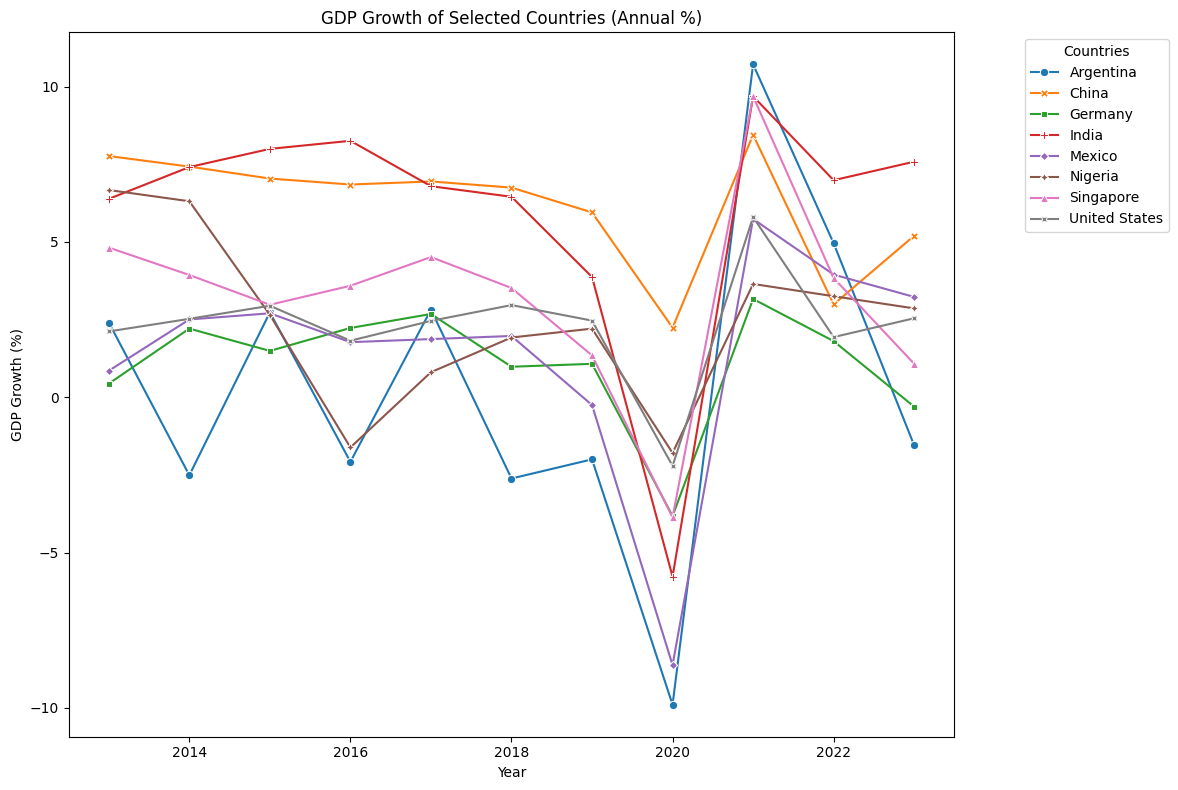

In [14]:
#Hacemos una lista seleccionando dos países de cada categoría
countries = ['United States', 'Germany', 'China', 'India', 'Nigeria', 'Mexico', 'Singapore', 'South Korea', 'Venezuela', 'Argentina']

#Filtramos el DataFrame para seleccionar las columnas que queremos grficar
df_sql_plot1 = df_sql1[df_sql1['Country Name'].isin(countries)]

#Creamos el gráfico usando seaborn
plt.figure(figsize=(12,8))
sns.lineplot(data=df_sql_plot1, x='Year', y='GDP_Growth_Percentage', hue='Country Name', style='Country Name', markers=True, dashes=False)

#Etiquetas y título
plt.xlabel('Year')
plt.ylabel('GDP Growth (%)')
plt.title('GDP Growth of Selected Countries (Annual %)')

#Mostrar la leyenda
plt.legend(title="Countries", loc="upper right", bbox_to_anchor=(1.25,1))

#Mostramos la gráfica
plt.tight_layout()
plt.show()

Una línea que sube por encima del 0% indica crecimiento económico. Esto significa que la economía del país está expandiéndose, produciendo más bienes y servicios que el año anterior.

Una línea que cae por debajo del 0% representa una contracción económica o recesión, lo que significa que el PIB ha disminuido en comparación con el año anterior.

Fluctuaciones:

Si la línea tiene altibajos abruptos, muestra que la economía es inestable o altamente volátil. Países que enfrentan crisis económicas, políticas inestables, o que dependen de mercados volátiles (por ejemplo, economías basadas en materias primas como el petróleo) tienden a tener fluctuaciones más pronunciadas.

Por otro lado, países con una línea más suave o consistente indican una economía estable, con un crecimiento más controlado.

Se puede observar que en el periodo 2019 - 2020 hubo una caída abripta en el PIB de todos los países, esto debido a la pandemia mundial del Covid-19.

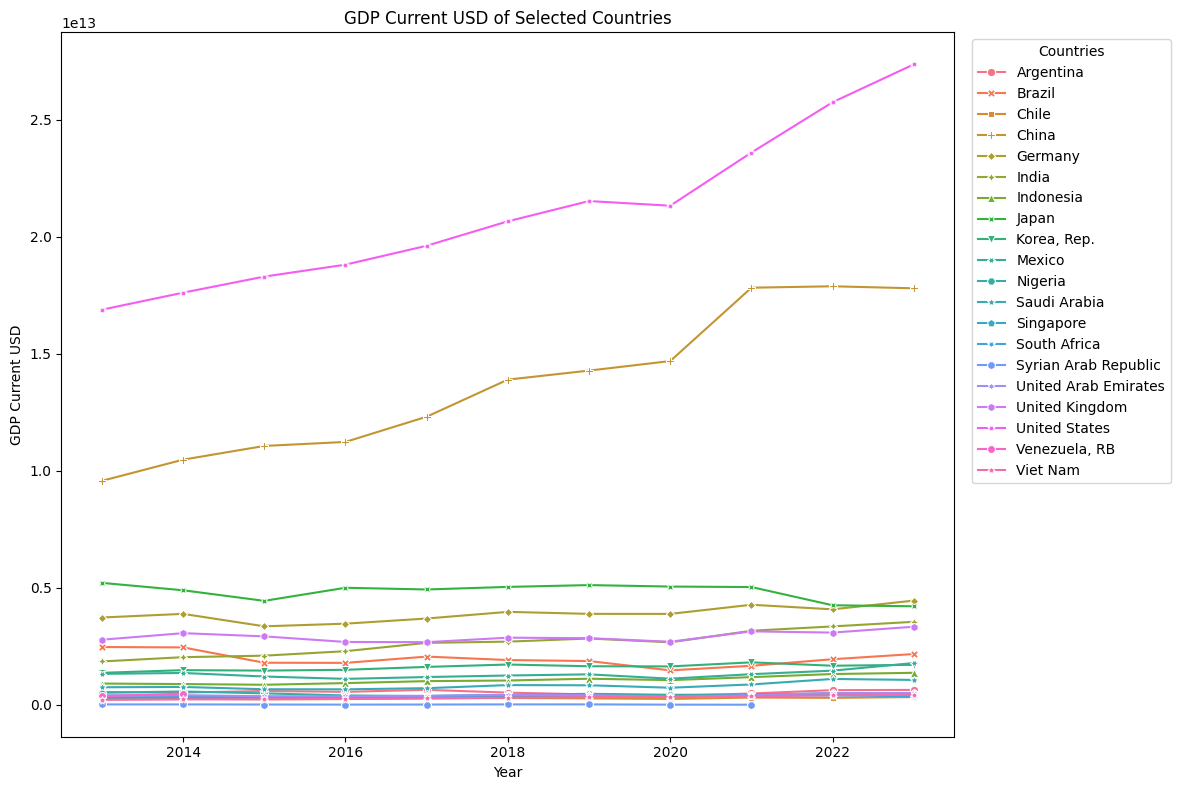

In [15]:
#Creamos el gráfico usando seaborn
plt.figure(figsize=(12,8))
sns.lineplot(data=df_sql1, x='Year', y='GDP_Current_USD', hue='Country Name', style='Country Name', markers=True, dashes=False)

#Etiquetas y título
plt.xlabel('Year')
plt.ylabel('GDP Current USD')
plt.title('GDP Current USD of Selected Countries')

#Mostrar la leyenda
plt.legend(title="Countries", loc="upper right", bbox_to_anchor=(1.25,1))

#Mostramos la gráfica
plt.tight_layout()
plt.show()

Esta métrica muestra el Producto Interno Bruto (PIB) de cada país en dólares corrientes para cada año. El PIB en dólares corrientes refleja el valor total de los bienes y servicios producidos en el país sin ajustar por inflación. Es decir, está influenciado tanto por el crecimiento real de la economía como por los cambios en los precios y el tipo de cambio de la moneda local con respecto al dólar.

Una línea ascendente indica que el PIB de ese país ha crecido en términos absolutos (sin ajuste por inflación). Esto puede deberse a un crecimiento económico real, inflación o devaluación del dólar frente a la moneda del país.

Una línea plana o con un crecimiento lento puede reflejar una economía estable o con un crecimiento moderado en términos absolutos.

Una línea descendente podría indicar una contracción económica, una disminución de la producción o una apreciación significativa del dólar frente a la moneda local.

Se peude observar que destacan China y Estados Unidos en su crecimiento económico.

#### 2. Inflación (Precios al consumidor, % anual)

In [19]:
-- Sentencia de SQL
SELECT
    "Country Name",
    "Year",
    MAX(CASE WHEN "Series Name" = 'Inflation, consumer prices (annual %)' THEN Value ELSE NULL END) AS "Inflation (%)",
    MAX(CASE WHEN "Series Name" = 'Inflation, GDP deflator (annual %)' THEN Value ELSE NULL END) AS "Inflation GDP (%)"
FROM world_indicators
WHERE "Series Name" IN ('Inflation, consumer prices (annual %)', 'Inflation, GDP deflator (annual %)')
GROUP BY "Country Name", "Year"
ORDER BY "Country Name", "Year";

SyntaxError: invalid syntax (1310073113.py, line 1)

In [16]:
#Inflación por país a lo largo de los años
query2 = '''
SELECT
    "Country Name",
    "Year",
    MAX(CASE WHEN "Series Name" = 'Inflation, consumer prices (annual %)' THEN Value ELSE NULL END) AS "Inflation (%)",
    MAX(CASE WHEN "Series Name" = 'Inflation, GDP deflator (annual %)' THEN Value ELSE NULL END) AS "Inflation GDP (%)"
FROM world_indicators
WHERE "Series Name" IN ('Inflation, consumer prices (annual %)', 'Inflation, GDP deflator (annual %)')
GROUP BY "Country Name", "Year"
ORDER BY "Country Name", "Year";
'''

#Ejecutamos la consulta y la guardamos en un DataFrame
df_sql2 = pd.read_sql_query(query2, conn)

#Mostramos el resultado
df_sql2


,Country Name,Year,Inflation (%),Inflation GDP (%)
0,Argentina,2013,NaN,23.948798
1,Argentina,2014,NaN,40.282972
2,Argentina,2015,NaN,26.579992
3,Argentina,2016,NaN,41.119380
4,Argentina,2017,NaN,26.006379
...,...,...,...,...
215,Viet Nam,2019,2.795824,2.423227
216,Viet Nam,2020,3.220934,1.467478
217,Viet Nam,2021,1.834716,2.880768
218,Viet Nam,2022,3.156507,4.051242


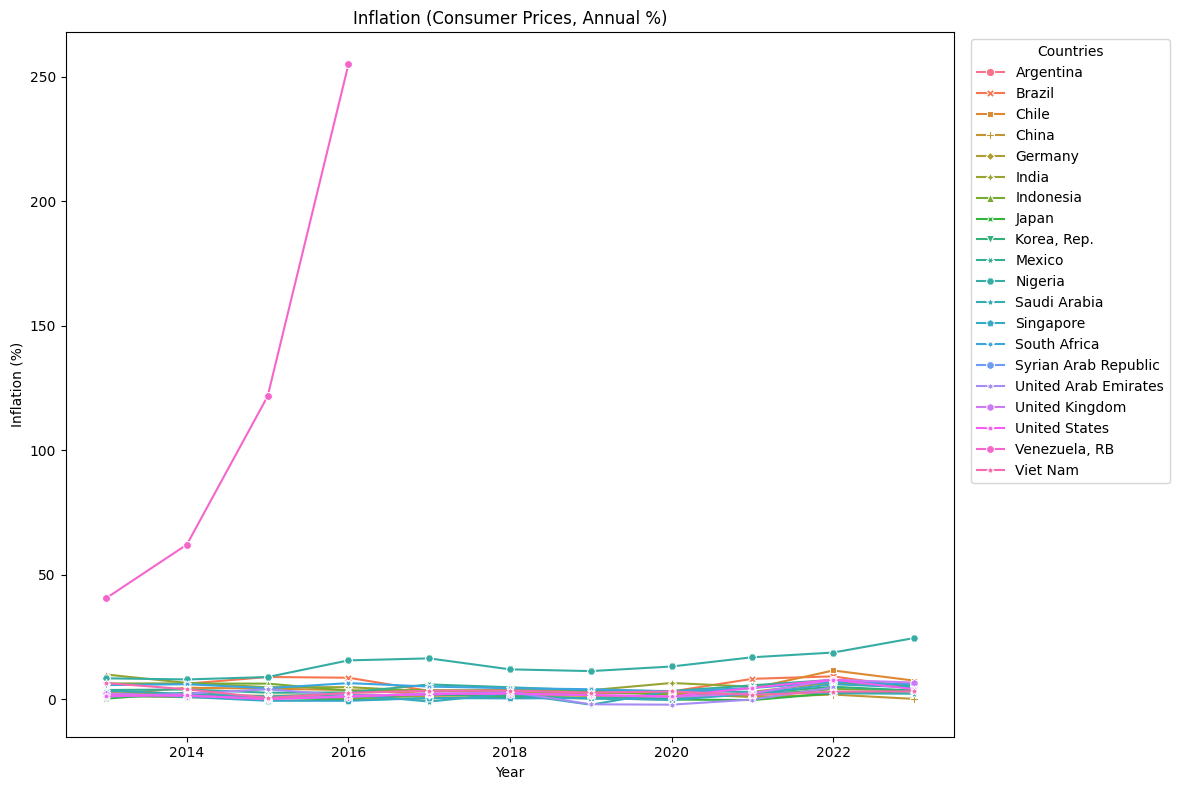

In [17]:
#Creamos el gráfico de líneas usando seaborn
plt.figure(figsize=(12,8))
sns.lineplot(data=df_sql2, x='Year', y='Inflation (%)', hue='Country Name', style='Country Name', markers=True, dashes=False)

#Etiquetas y título
plt.xlabel('Year')
plt.ylabel('Inflation (%)')
plt.title('Inflation (Consumer Prices, Annual %)')

#Mostrar la leyenda
plt.legend(title="Countries", loc="upper right", bbox_to_anchor=(1.25,1))

#Mostramos el gráfico
plt.tight_layout()
plt.show()

Tendencias generales: Los países con una inflación constante y baja son típicos de economías estables.

Volatilidad: Países con inflación muy variable pueden estar lidiando con crisis económicas.

Comportamiento de las economías emergentes: La inflación en economías emergentes como India, Brasil, Arabia Saudita o los Emiratos Árabes puede variar según las políticas fiscales y las condiciones económicas globales.

Este mide los cambios en los precios de los bienes de consumo y servicios que suelen adquirir los hogares. Es un indicador clave del costo de vida.

Si la inflación es alta, indica que los consumidores deben pagar más por los mismos productos, lo que reduce el poder adquisitivo de los ingresos.

Podemos observar que Argentina atraviesa una fuerte crisis económica desde hace varios años, teniendo una inflación muy alta, lamentablemente solo hay datos hasta el año 2016.

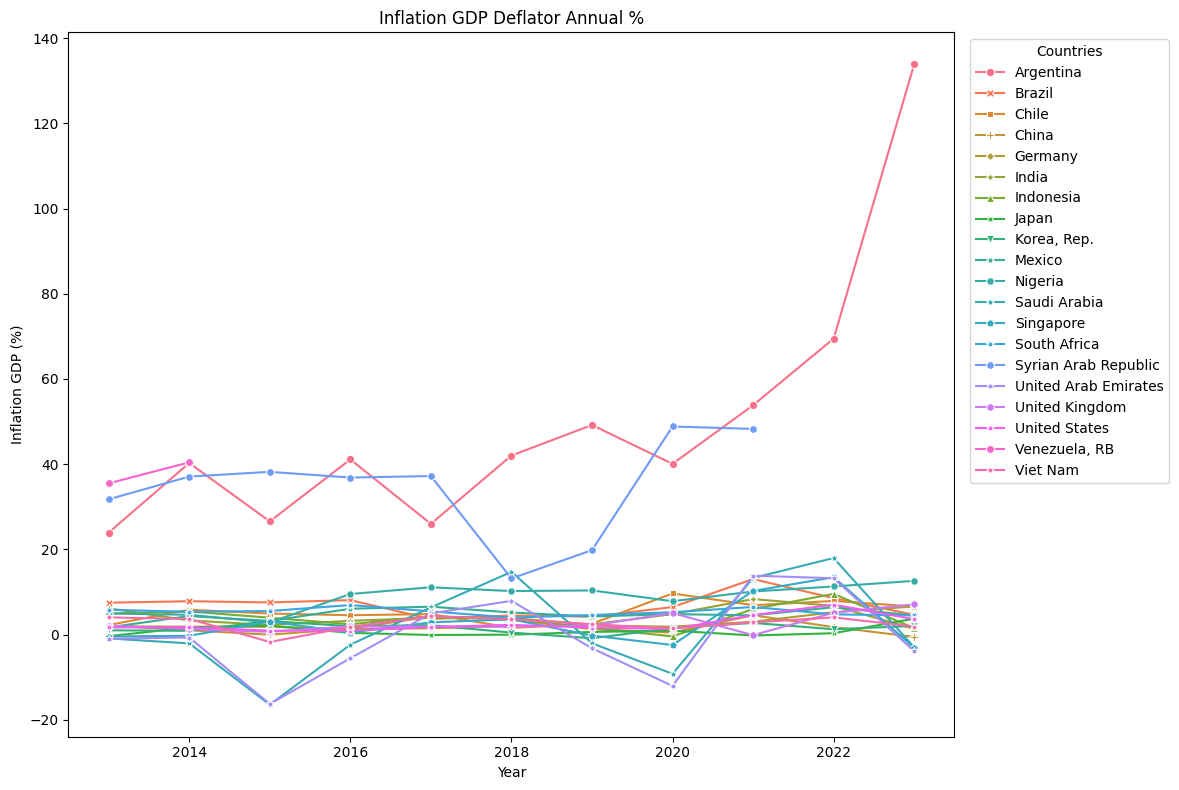

In [18]:
#Creamos el gráfico de líneas usando seaborn
plt.figure(figsize=(12,8))
sns.lineplot(data=df_sql2, x='Year', y='Inflation GDP (%)', hue='Country Name', style='Country Name', markers=True, dashes=False)

#Etiquetas y título
plt.xlabel('Year')
plt.ylabel('Inflation GDP (%)')
plt.title('Inflation GDP Deflator Annual %')

#Mostrar la leyenda
plt.legend(title="Countries", loc="upper right", bbox_to_anchor=(1.25,1))

#Mostramos el gráfico
plt.tight_layout()
plt.show()

1. Cambios en el nivel de precios de toda la economía:
El GDP deflactor refleja el cambio general en los precios de todos los bienes y servicios producidos en una economía, no solo los bienes de consumo. Si la gráfica muestra un aumento en el deflactor, significa que los precios en general han aumentado en la economía, incluyendo inversiones, exportaciones y consumo.
Un valor alto sugiere inflación, ya que todos los sectores de la economía están experimentando aumentos en los precios.

2. Diferencias entre economías:
En economías avanzadas, es probable que el deflactor tenga movimientos más estables y predecibles. Un aumento constante indica una economía con crecimiento moderado de los precios, típico de economías maduras.
En economías emergentes o en desarrollo, el deflactor podría mostrar mayor volatilidad. Las fluctuaciones fuertes pueden reflejar cambios bruscos en el crecimiento económico, ajustes en la política monetaria o cambios estructurales en la economía.

3. Períodos de crisis:
En economías en crisis, el GDP deflactor puede dispararse, reflejando hiperinflación o colapsos económicos. Si la gráfica muestra un incremento abrupto, esto es una señal de que los precios están fuera de control y que la economía está en una fase de desestabilización grave.

4. Comparación con otras métricas de inflación:
Aunque similar a la inflación, el GDP deflactor cubre toda la economía. Si la gráfica muestra aumentos que no se reflejan en los índices de precios al consumidor, puede significar que sectores no relacionados con el consumo, como la inversión o las exportaciones, están sufriendo una presión inflacionaria mayor.

5. Tendencias a largo plazo:
Si la gráfica muestra una tendencia al alza de forma constante en varias economías, esto indica que los precios están aumentando en general, lo cual es una señal de expansión económica o de presión inflacionaria persistente. Si la tendencia es negativa, podría reflejar deflación o una recesión económica, donde los precios en la economía en su conjunto están disminuyendo.

#### 3. Relacionando matrícula escolar con la tasa de participación en la fuerza laboral y desempleo

In [ ]:
-- Sentencia de SQL
SELECT
    "Country Name",
    "Year",
    MAX(CASE WHEN "Series Name" = 'School enrollment, primary (% gross)' THEN "Value" END) AS "School Enrollment Primary",
    MAX(CASE WHEN "Series Name" = 'School enrollment, secondary (% gross)' THEN "Value" END) AS "School Enrollment Secondary",
    MAX(CASE WHEN "Series Name" = 'School enrollment, tertiary (% gross)' THEN "Value" END) AS "School Enrollment Tertiary",
    MAX(CASE WHEN "Series Name" = 'Unemployment, total (% of total labor force) (national estimate)' THEN "Value" END) AS "Unemployment",
    MAX(CASE WHEN "Series Name" = 'Labor force participation rate, total (% of total population ages 15+) (national estimate)' THEN "Value" END) AS "Labor Force Participation Rate"
FROM world_indicators
WHERE "Series Name" IN (
    'School enrollment, primary (% gross)',
    'School enrollment, secondary (% gross)',
    'School enrollment, tertiary (% gross)',
    'Unemployment, total (% of total labor force) (national estimate)',
    'Labor force participation rate, total (% of total population ages 15+) (national estimate)'
)
GROUP BY "Country Name", "Year"
ORDER BY "Country Name", "Year";

In [19]:
#Matrícula escolar con tasa de participación laboral y desempleo
query3 = '''
SELECT
    "Country Name",
    "Year",
    MAX(CASE WHEN "Series Name" = 'School enrollment, primary (% gross)' THEN "Value" END) AS "School Enrollment Primary",
    MAX(CASE WHEN "Series Name" = 'School enrollment, secondary (% gross)' THEN "Value" END) AS "School Enrollment Secondary",
    MAX(CASE WHEN "Series Name" = 'School enrollment, tertiary (% gross)' THEN "Value" END) AS "School Enrollment Tertiary",
    MAX(CASE WHEN "Series Name" = 'Unemployment, total (% of total labor force) (national estimate)' THEN "Value" END) AS "Unemployment",
    MAX(CASE WHEN "Series Name" = 'Labor force participation rate, total (% of total population ages 15+) (national estimate)' THEN "Value" END) AS "Labor Force Participation Rate"
FROM world_indicators
WHERE "Series Name" IN (
    'School enrollment, primary (% gross)',
    'School enrollment, secondary (% gross)',
    'School enrollment, tertiary (% gross)',
    'Unemployment, total (% of total labor force) (national estimate)',
    'Labor force participation rate, total (% of total population ages 15+) (national estimate)'
)
GROUP BY "Country Name", "Year"
ORDER BY "Country Name", "Year";
'''

#Ejecutamos la consulta y la guardamos en un DataFrame
df_sql3 = pd.read_sql_query(query3, conn)

#Mostramos el resultado
df_sql3

,Country Name,Year,School Enrollment Primary,School Enrollment Secondary,School Enrollment Tertiary,Unemployment,Labor Force Participation Rate
0,Argentina,2013,114.509239,104.596748,78.768661,7.100,59.962
1,Argentina,2014,113.961884,106.092133,81.169411,7.268,59.444
2,Argentina,2015,113.778198,107.549072,83.762581,NaN,NaN
3,Argentina,2016,112.944267,109.645943,86.617882,NaN,NaN
4,Argentina,2017,111.681458,110.412407,89.232941,8.347,58.808
...,...,...,...,...,...,...,...
215,Viet Nam,2019,117.422997,93.153999,28.506929,1.681,75.630
216,Viet Nam,2020,119.024002,93.790001,NaN,2.103,73.283
217,Viet Nam,2021,120.023003,96.067001,38.873001,2.385,72.897
218,Viet Nam,2022,123.134003,97.249001,42.223999,1.523,73.633


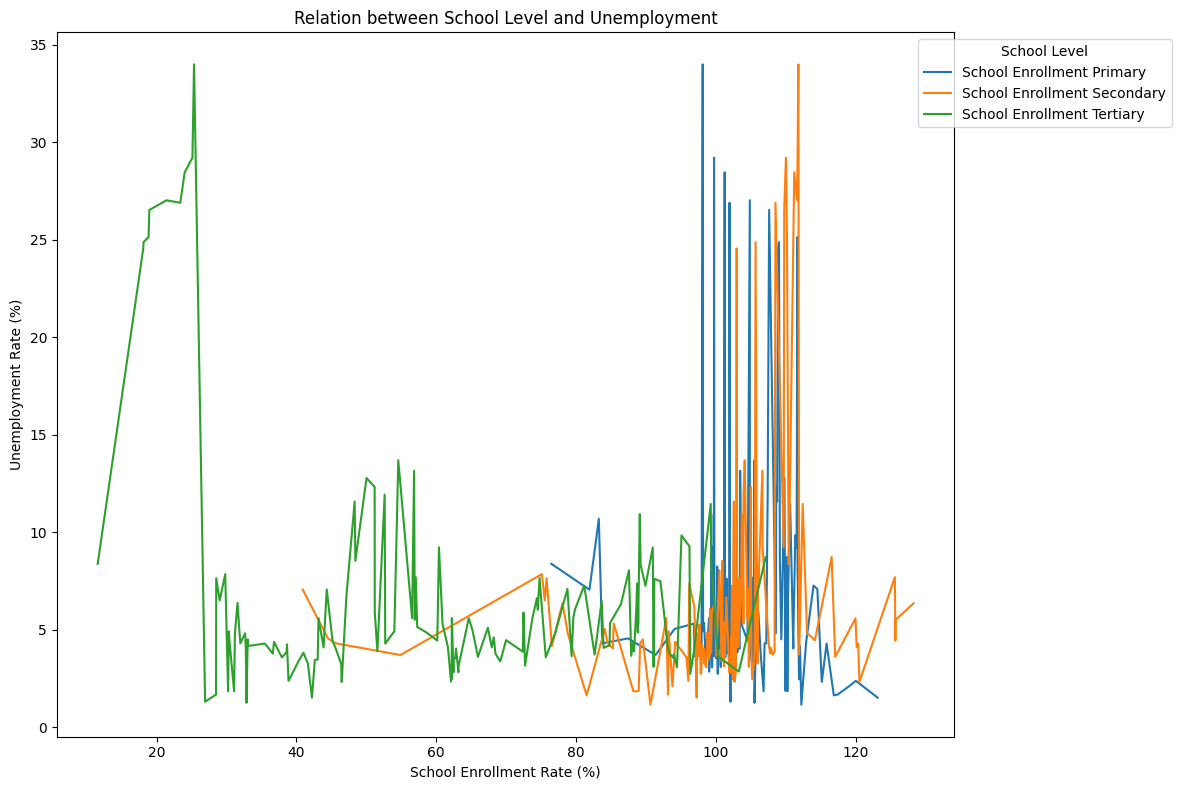

In [20]:
#Filtramos el DataFrame obtenido en la consulta de SQL
df_sql_plot3 = df_sql3.melt(id_vars=['Country Name', 'Year', 'Unemployment'],
                            value_vars=['School Enrollment Primary', 'School Enrollment Secondary', 'School Enrollment Tertiary'],
                            var_name='School Level',
                            value_name='Enrollment Rate')

#Creamos una gráfica de dispersión con líneas para mostrar la relación entre matrícula y desempleo
plt.figure(figsize=(12,8))
sns.lineplot(data=df_sql_plot3, x='Enrollment Rate', y='Unemployment', hue='School Level', markers=True, dashes=False)

#Etiquetas y título
plt.xlabel('School Enrollment Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.title('Relation between School Level and Unemployment')

#Mostrar la leyenda
plt.legend(title="School Level", loc="upper right", bbox_to_anchor=(1.25,1))

#Mostrar la gráfica
plt.tight_layout()
plt.show()

Se muestra cómo las tasas de matrícula en diferentes niveles (primaria, secundaria, terciaria) se relacionan con la tasa de desempleo.
Si las tasas de matrícula escolar están correlacionadas negativamente con el desempleo, se verá que a medida que aumenta la matrícula, el desempleo disminuye. Esto podría indicar que un mayor acceso a la educación está relacionado con una menor tasa de desempleo.
Sin embargo, si no hay una correlación clara, puede que la relación entre matrícula escolar y desempleo no sea directa o dependa de otros factores contextuales de los países.

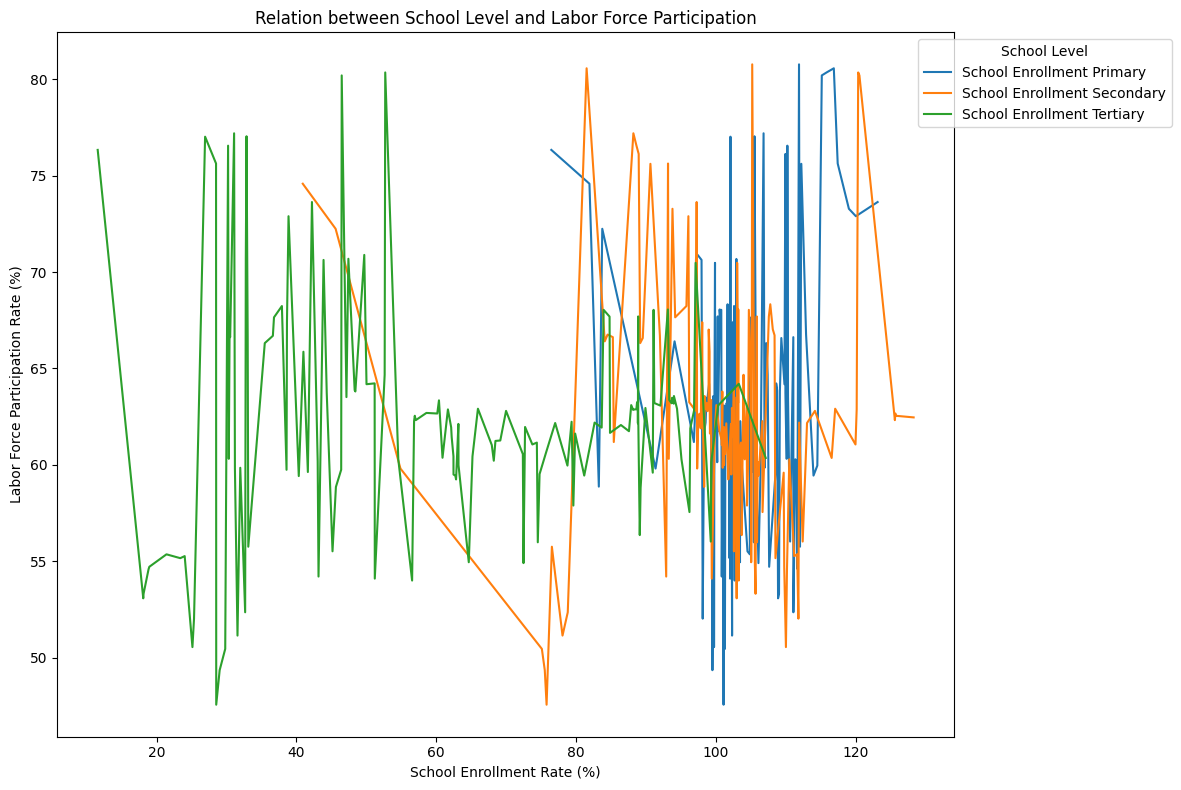

In [21]:
#Filtramos el DataFrame obtenido en la consulta de SQL
df_sql_plot4 = df_sql3.melt(id_vars=['Country Name', 'Year', 'Labor Force Participation Rate'],
                            value_vars=['School Enrollment Primary', 'School Enrollment Secondary', 'School Enrollment Tertiary'],
                            var_name='School Level',
                            value_name='Enrollment Rate')

#Creamos una gráfica de dispersión con líneas para mostrar la relación entre matrícula y desempleo
plt.figure(figsize=(12,8))
sns.lineplot(data=df_sql_plot4, x='Enrollment Rate', y='Labor Force Participation Rate', hue='School Level', markers=True, dashes=False)

#Etiquetas y título
plt.xlabel('School Enrollment Rate (%)')
plt.ylabel('Labor Force Participation Rate (%)')
plt.title('Relation between School Level and Labor Force Participation')

#Mostrar la leyenda
plt.legend(title="School Level", loc="upper right", bbox_to_anchor=(1.25,1))

#Mostrar la gráfica
plt.tight_layout()
plt.show()

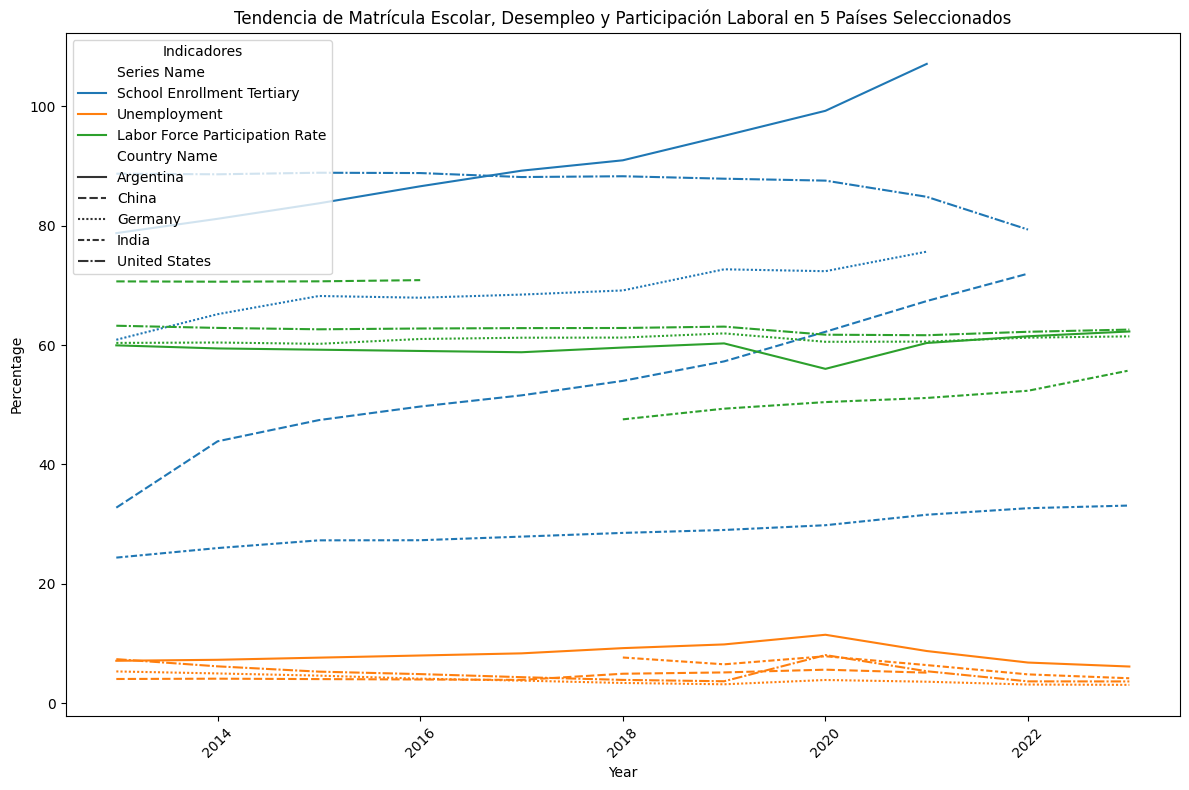

In [22]:
#Seleccionamos 5 países específicos
selected_countries = ['United States', 'China', 'Germany', 'Argentina', 'India']

#Filtramos el DataFrame para seleccionar los países deseados
df_sql_plot5 = df_sql3[df_sql3['Country Name'].isin(selected_countries)]

#Filtramos los indicadores que queremos graficar
df_sql_plot5 = df_sql_plot5.melt(id_vars=['Country Name', 'Year'], 
                                                   value_vars=['School Enrollment Tertiary', 
                                                               'Unemployment', 
                                                               'Labor Force Participation Rate'],
                                                   var_name='Series Name', 
                                                   value_name='Value')

#Creamos el gráfico con los 5 países seleccionados
plt.figure(figsize=(12,8))
sns.lineplot(data=df_sql_plot5, x='Year', y='Value', hue='Series Name', style='Country Name')

#Etiquetas y título
plt.title('Tendencia de Matrícula Escolar, Desempleo y Participación Laboral en 5 Países Seleccionados')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Indicadores')

#Ajuste del layout
plt.tight_layout()

#Mostrar la gráfica
plt.show()



Tendencias en la matrícula escolar:

Las líneas de "School Enrollment Primary", "School Enrollment Secondary", y "School Enrollment Tertiary" muestran cómo han evolucionado las tasas de matrícula en los diferentes niveles de educación (primaria, secundaria y terciaria) a lo largo del tiempo.
Si las líneas están aumentando, esto sugiere que un mayor porcentaje de la población está accediendo a la educación en esos niveles con el paso de los años.
Tasa de desempleo:

La línea correspondiente al desempleo muestra cómo ha fluctuado la tasa de desempleo a lo largo del tiempo.
Si la línea tiene picos o caídas abruptas, puede indicar momentos de crisis económica o recuperación.
Comparar las tendencias de la matrícula escolar con el desempleo puede permitir observar si un mayor acceso a la educación ha tenido un efecto en la tasa de desempleo. Por ejemplo, si una mayor educación se corresponde con una disminución del desempleo, podrías hacer inferencias sobre la relación entre educación y empleabilidad.
Participación laboral:

La línea de participación laboral muestra qué porcentaje de la población está trabajando o buscando trabajo (activa en el mercado laboral).
Si la participación laboral aumenta mientras las tasas de matrícula escolar también lo hacen, podría sugerir que las personas están accediendo a más educación y aún están dispuestas a participar en la fuerza laboral.
Si la matrícula aumenta mientras la participación laboral disminuye, podría indicar que más personas están eligiendo continuar su educación en lugar de ingresar inmediatamente al mercado laboral.

#### 4. Relación de la inflación con las tasas de desempleo y el crecimiento del PIB 

In [ ]:
-- Sentencia de SQL
SELECT
    "Country Name",
    "Year",
    MAX(CASE WHEN "Series Name" = 'Inflation, consumer prices (annual %)' THEN "Value" END) AS "Inflation Rate",
    MAX(CASE WHEN "Series Name" = 'Unemployment, total (% of total labor force) (national estimate)' THEN "Value" END) AS "Unemployment Rate",
    MAX(CASE WHEN "Series Name" = 'GDP growth (annual %)' THEN "Value" END) AS "GDP Growth"
FROM world_indicators
WHERE "Series Name" IN (
    'Inflation, consumer prices (annual %)',
    'Unemployment, total (% of total labor force) (national estimate)',
    'GDP growth (annual %)'
)
GROUP BY "Country Name", "Year",
ORDER BY "Country Name", "Year";

In [23]:
#Relacionamos la inflación con las tasas de desempleo y el crecimiento del PIB (Curva de Phillips)
query4 = ''' 
SELECT
    "Country Name",
    "Year",
    MAX(CASE WHEN "Series Name" = 'Inflation, consumer prices (annual %)' THEN "Value" END) AS "Inflation Rate",
    MAX(CASE WHEN "Series Name" = 'Unemployment, total (% of total labor force) (national estimate)' THEN "Value" END) AS "Unemployment Rate",
    MAX(CASE WHEN "Series Name" = 'GDP growth (annual %)' THEN "Value" END) AS "GDP Growth"
FROM world_indicators
WHERE "Series Name" IN (
    'Inflation, consumer prices (annual %)',
    'Unemployment, total (% of total labor force) (national estimate)',
    'GDP growth (annual %)'
)
GROUP BY "Country Name", "Year"
ORDER BY "Country Name", "Year";
'''

#Ejecutamos la consulta y la gurdamos en un DataFrame
df_sql4 = pd.read_sql_query(query4, conn)

#Mostramos el resultado
df_sql4


,Country Name,Year,Inflation Rate,Unemployment Rate,GDP Growth
0,Argentina,2013,NaN,7.100,2.405324
1,Argentina,2014,NaN,7.268,-2.512615
2,Argentina,2015,NaN,NaN,2.731160
3,Argentina,2016,NaN,NaN,-2.080328
4,Argentina,2017,NaN,8.347,2.818503
...,...,...,...,...,...
215,Viet Nam,2019,2.795824,1.681,7.359263
216,Viet Nam,2020,3.220934,2.103,2.865413
217,Viet Nam,2021,1.834716,2.385,2.553729
218,Viet Nam,2022,3.156507,1.523,8.123514


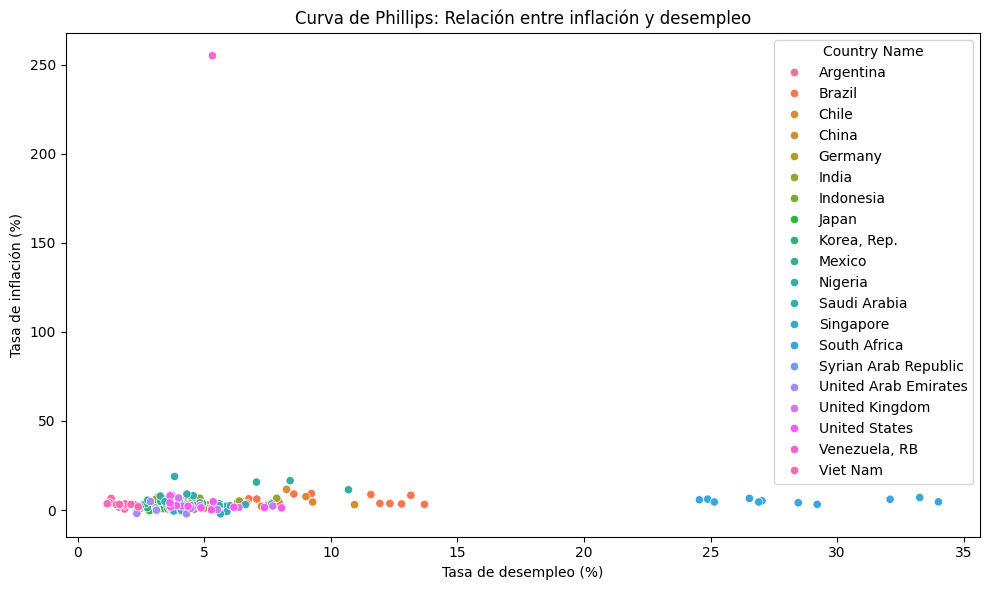

In [25]:
#Creamos un gráfico de dispersión para visualizar la relación entre inflación y desempleo
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_sql4, x='Unemployment Rate', y='Inflation Rate', hue='Country Name')

#Etiquetas y título
plt.title('Curva de Phillips: Relación entre inflación y desempleo')
plt.xlabel('Tasa de desempleo (%)')
plt.ylabel('Tasa de inflación (%)')

#Mostramos el gráfico
plt.tight_layout()
plt.show()

Curva de Phillips: Un gráfico de dispersión de inflación contra desempleo, permite observar si hay una relación inversa entre estas dos variables, que es la base de la Curva de Phillips. A medida que la tasa de desempleo baja, normalmente la inflación tiende a subir.

#### 5. Desigualdad y crecimiento económico

In [ ]:
-- Sentencia de SQL
SELECT 
    "Country Name",
    "Year",
    MAX(CASE WHEN "Series Name" = 'Gini index' THEN "Value" END) AS "Gini index",
    MAX(CASE WHEN "Series Name" = 'GDP growth (annual %)' THEN "Value" END) AS "GDP Growth"
FROM world_indicators
WHERE "Series Name" IN (
    'Gini index',
    'GDP growth (annual %)'
)
GROUP BY "Country Name", "Year"
ORDER BY "Country Name", "Year";

In [26]:
#Analizamos la desigualdad y el crecimiento económico
query5 = ''' 
SELECT 
    "Country Name",
    "Year",
    MAX(CASE WHEN "Series Name" = 'Gini index' THEN "Value" END) AS "Gini index",
    MAX(CASE WHEN "Series Name" = 'GDP growth (annual %)' THEN "Value" END) AS "GDP Growth"
FROM world_indicators
WHERE "Series Name" IN (
    'Gini index',
    'GDP growth (annual %)'
)
GROUP BY "Country Name", "Year"
ORDER BY "Country Name", "Year";
'''

#Ejecutamos la consulta y la gurdamos en un DataFrame
df_sql5 = pd.read_sql_query(query5, conn)

#Mostramos el resultado
df_sql5

,Country Name,Year,Gini index,GDP Growth
0,Argentina,2013,41.1,2.405324
1,Argentina,2014,41.8,-2.512615
2,Argentina,2015,NaN,2.731160
3,Argentina,2016,42.3,-2.080328
4,Argentina,2017,41.4,2.818503
...,...,...,...,...
215,Viet Nam,2019,NaN,7.359263
216,Viet Nam,2020,36.8,2.865413
217,Viet Nam,2021,NaN,2.553729
218,Viet Nam,2022,36.1,8.123514


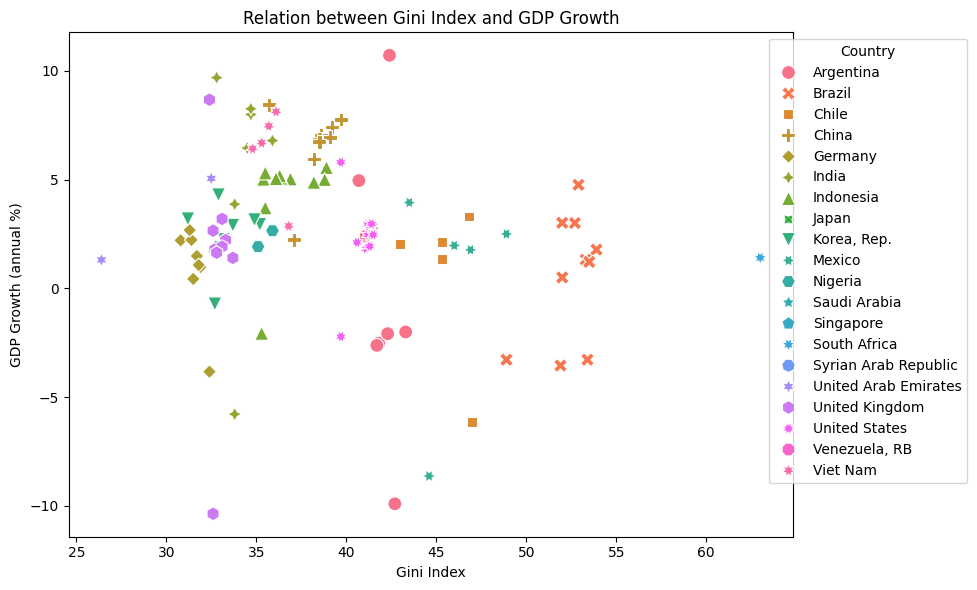

In [27]:
#Creamos una gráfica de dispersión para Gini vs GDP Growth
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_sql5, x='Gini index', y='GDP Growth', hue='Country Name', style='Country Name', s=100)

#Título y etiquetas
plt.title('Relation between Gini Index and GDP Growth')
plt.xlabel('Gini Index')
plt.ylabel('GDP Growth (annual %)')

#Mostramos la leyenda
plt.legend(title="Country", loc="upper right", bbox_to_anchor=(1.25,1))

#Mostramos la gráfica
plt.tight_layout()
plt.show()

Eje X - Índice de Gini:

El índice de Gini mide la desigualdad de ingresos en un país, donde 0 representa igualdad perfecta (todos ganan lo mismo) y 100 representa desigualdad máxima (una sola persona tiene todos los ingresos).
Los países con un índice de Gini bajo tienen una distribución más equitativa de los ingresos, mientras que los países con un índice de Gini alto experimentan mayor desigualdad.


Eje Y - Crecimiento del PIB (%):

Este eje muestra el crecimiento económico anual de cada país. Un valor positivo indica que la economía del país está creciendo, mientras que un valor negativo indica que está en recesión o contrayéndose.


Patrones en los datos:

Si los puntos de datos tienden a formar una línea o una curva: Esto podría indicar que hay una relación clara entre la desigualdad y el crecimiento económico. 

Por ejemplo:
Si el crecimiento del PIB aumenta a medida que el índice de Gini aumenta, podría sugerir que la desigualdad está asociada con un mayor crecimiento económico en esos países.
Si el crecimiento del PIB disminuye a medida que aumenta el índice de Gini, sugeriría que una mayor desigualdad puede frenar el crecimiento económico.
Si los puntos están dispersos sin un patrón claro: Esto indicaría que no hay una relación consistente entre la desigualdad y el crecimiento del PIB. En otras palabras, la desigualdad económica no parece influir significativamente en el crecimiento económico de forma consistente entre los países.


Posibles observaciones específicas:

Puedes observar si los países con índices de Gini más altos (más desigualdad) tienden a experimentar menos crecimiento o recesión.
También podrías notar si hay excepciones, donde algunos países logran un crecimiento económico significativo a pesar de una alta desigualdad, o viceversa.

#### 6. Exportaciones e Importaciones

In [ ]:
-- Sentencia de SQL
SELECT
    "Country Name",
    "Year",
    MAX(CASE WHEN "Series Name" = 'Exports of goods and services (% of GDP)' THEN "Value" END) AS "Exports (% of GDP)",
    MAX(CASE WHEN "Series Name" = 'Imports of goods and services (% of GDP)' THEN "Value" END) AS "Imports (% of GDP)",
    MAX(CASE WHEN "Series Name" = 'GDP growth (annual %)' THEN "Value" END) AS "GDP Growth"
FROM world_indicators
WHERE "Series Name" IN (
    'Exports of goods and services (% of GDP)',
    'Imports of goods and services (% of GDP)',
    'GDP growth (annual %)'
)
GROUP BY "Country Name", "Year"
ORDER BY "Country Name", "Year";

In [28]:
#Analizamos como estan relacionadas las exportaciones e importaciones de bienes y servicios con el crecimiento económico
query6 = ''' 
SELECT
    "Country Name",
    "Year",
    MAX(CASE WHEN "Series Name" = 'Exports of goods and services (% of GDP)' THEN "Value" END) AS "Exports (% of GDP)",
    MAX(CASE WHEN "Series Name" = 'Imports of goods and services (% of GDP)' THEN "Value" END) AS "Imports (% of GDP)",
    MAX(CASE WHEN "Series Name" = 'GDP growth (annual %)' THEN "Value" END) AS "GDP Growth"
FROM world_indicators
WHERE "Series Name" IN (
    'Exports of goods and services (% of GDP)',
    'Imports of goods and services (% of GDP)',
    'GDP growth (annual %)'
)
GROUP BY "Country Name", "Year"
ORDER BY "Country Name", "Year";
'''

#Ejecutamos la consulta y la guardamos en un DataFrame
df_sql6 = pd.read_sql_query(query6, conn)

#Mostramo el resultado
df_sql6

,Country Name,Year,Exports (% of GDP),Imports (% of GDP),GDP Growth
0,Argentina,2013,14.617173,14.716756,2.405324
1,Argentina,2014,14.405479,14.001315,-2.512615
2,Argentina,2015,10.705652,11.780574,2.731160
3,Argentina,2016,12.527095,13.566793,-2.080328
4,Argentina,2017,11.320283,13.969318,2.818503
...,...,...,...,...,...
215,Viet Nam,2019,85.157587,79.546627,7.359263
216,Viet Nam,2020,84.381598,78.864265,2.865413
217,Viet Nam,2021,93.850207,92.825626,2.553729
218,Viet Nam,2022,93.811638,89.977903,8.123514


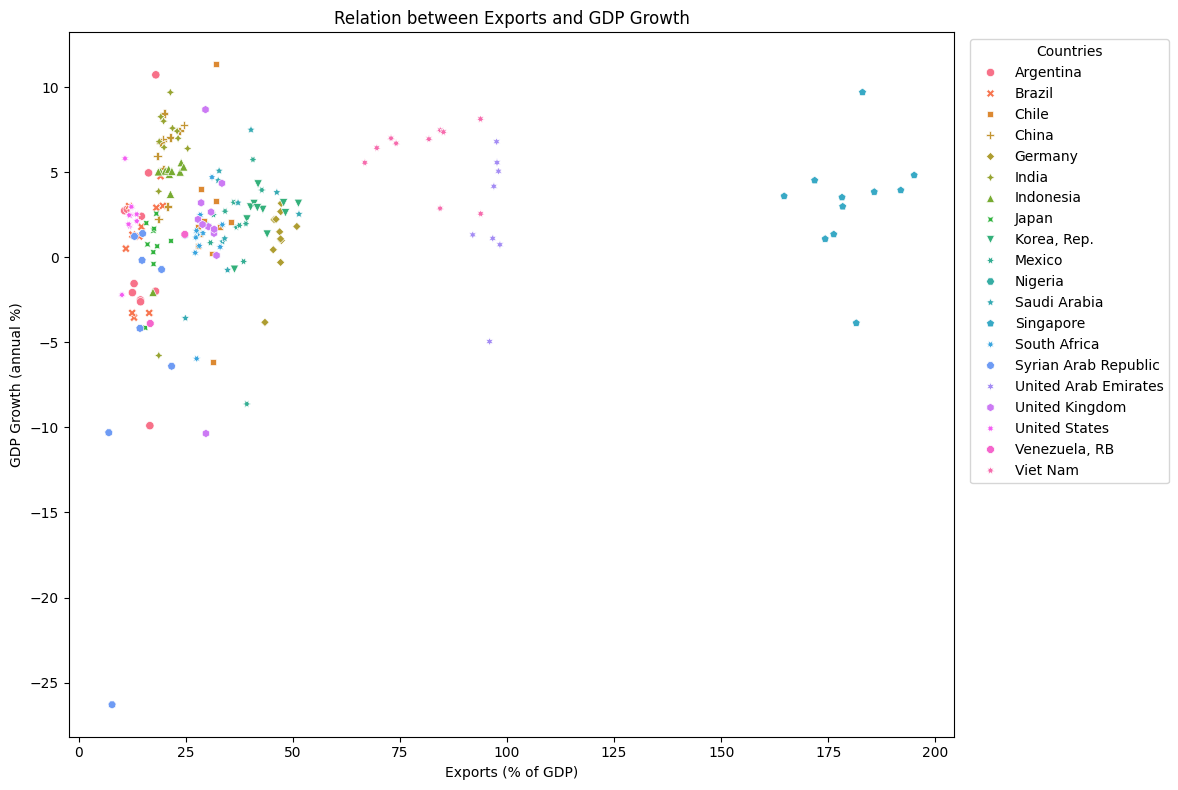

In [29]:
#Creamos un gráfico de dispersión para mostrar la relación entre exportaciones y crecimiento del PIB
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_sql6, x='Exports (% of GDP)', y='GDP Growth', hue='Country Name', style='Country Name', markers=True)

#Etiquetas y título
plt.title('Relation between Exports and GDP Growth')
plt.xlabel('Exports (% of GDP)')
plt.ylabel('GDP Growth (annual %)')

#Mostramos la leyenda
plt.legend(title="Countries", loc="upper right", bbox_to_anchor=(1.25,1))

#Mostramos la gráfica
plt.tight_layout()
plt.show()

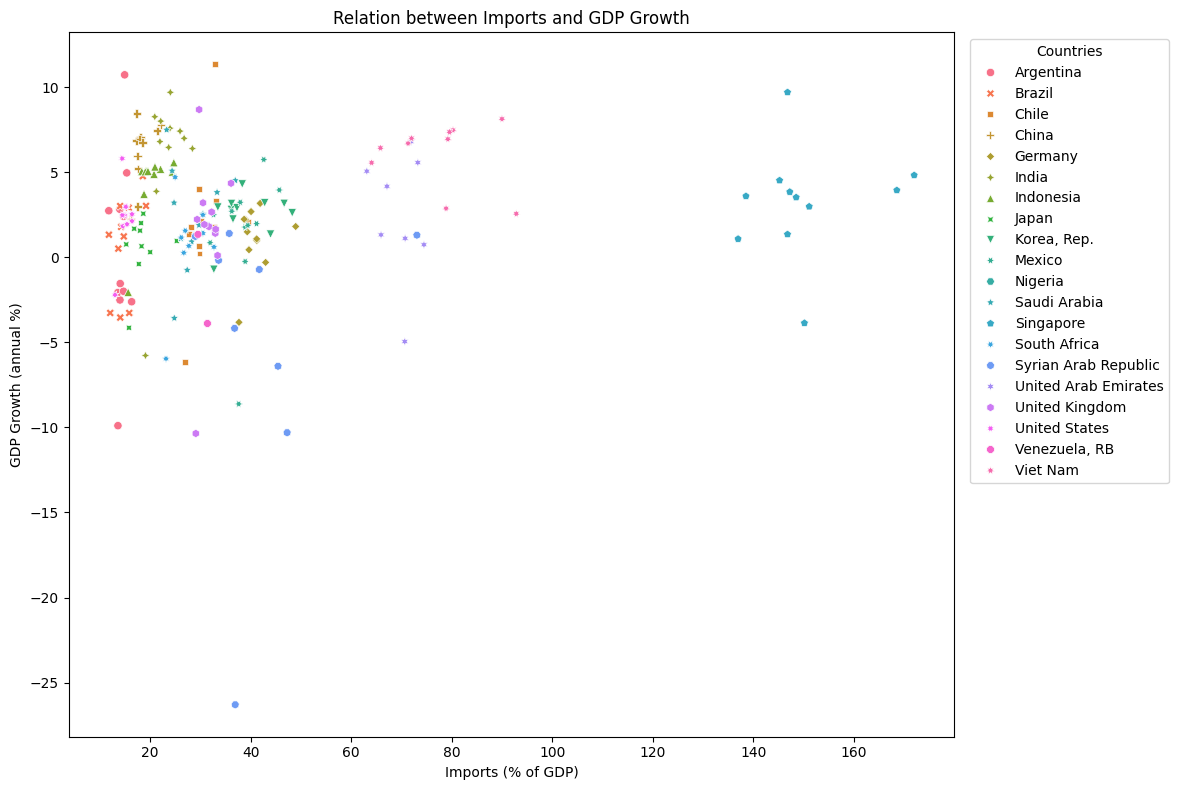

In [42]:
#Creamos un gráfico de dispersión para mostrar la relación entre importaciones y crecimiento del PIB
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_sql6, x='Imports (% of GDP)', y='GDP Growth', hue='Country Name', style='Country Name', markers=True)

#Etiquetas y título
plt.title('Relation between Imports and GDP Growth')
plt.xlabel('Imports (% of GDP)')
plt.ylabel('GDP Growth (annual %)')

#Mostramos la leyenda
plt.legend(title="Countries", loc="upper right", bbox_to_anchor=(1.25,1))

#Mostramos la gráfica
plt.tight_layout()
plt.show()

Relación entre exportaciones e importaciones con el crecimiento económico:

Exportaciones (% del PIB) y Crecimiento del PIB: Si observamos que un mayor porcentaje de exportaciones está asociado con un mayor crecimiento del PIB, puede indicar que la economía depende significativamente del comercio exterior para su expansión.

Importaciones (% del PIB) y Crecimiento del PIB: Del mismo modo, un aumento en las importaciones también podría estar relacionado con el crecimiento económico si las importaciones incluyen bienes de capital o insumos que impulsan la producción nacional.

#### 7. Emisiones de CO2 y Acceso a Electricidad

In [ ]:
-- Sentencia de SQL
SELECT
    "Country Name",
    "Year",
    MAX(CASE WHEN "Series Name" = 'CO2 emissions (metric tons per capita)' THEN "Value" END) AS "Co2 Emissions (metric tons per capita)",
    MAX(CASE WHEN "Series Name" = 'Access to electricity (% of population)' THEN "Value" END) AS "Access to Electricity (%)"
FROM world_indicators
WHERE "Series Name" IN ('CO2 emissions (metric tons per capita)', 'Access to electricity (% of population)')
GROUP BY "Country Name", "Year"
ORDER BY "Country Name", "Year";

In [30]:
#Analizamos las emisiones de CO2 y el acceso a Electricidad
query7 = ''' 
SELECT
    "Country Name",
    "Year",
    MAX(CASE WHEN "Series Name" = 'CO2 emissions (metric tons per capita)' THEN "Value" END) AS "Co2 Emissions (metric tons per capita)",
    MAX(CASE WHEN "Series Name" = 'Access to electricity (% of population)' THEN "Value" END) AS "Access to Electricity (%)"
FROM world_indicators
WHERE "Series Name" IN ('CO2 emissions (metric tons per capita)', 'Access to electricity (% of population)')
GROUP BY "Country Name", "Year"
ORDER BY "Country Name", "Year";
'''

#Ejecutamos la consulta y la guardamos en un DataFrame
df_sql7 = pd.read_sql_query(query7, conn)

#Mostramos el resultado
df_sql7

,Country Name,Year,Co2 Emissions (metric tons per capita),Access to Electricity (%)
0,Argentina,2013,4.342250,99.3
1,Argentina,2014,4.209112,100.0
2,Argentina,2015,4.301914,99.7
3,Argentina,2016,4.201816,99.9
4,Argentina,2017,4.070112,100.0
...,...,...,...,...
215,Viet Nam,2019,3.567848,99.4
216,Viet Nam,2020,3.676440,99.8
217,Viet Nam,2021,NaN,100.0
218,Viet Nam,2022,NaN,100.0


In [44]:
#ESTA PARTE DEL CÓDIGO NO SE UTILIZA

#from geopy.geocoders import Nominatim
#import time

#Creamos una lsita con los nombres de los países 
#countries = ['United States', 'Germany', 'Japan', 'United Kingdom',
#       'United Arab Emirates', 'China', 'India', 'Brazil', 'Saudi Arabia',
#       'South Africa', 'Nigeria', 'Indonesia', 'Mexico', 'Viet Nam',
#       'Singapore', 'Chile', 'Korea, Rep.', 'Venezuela, RB', 'Argentina',
#       'Syrian Arab Republic']

#Iniciamos el geolocalizador
#geolocator = Nominatim(user_agent="geoapiExercises")

#Creamos un diccionario para almacenar los resultados
#data = {'Country Name':[], 'Latitude':[], 'Longitude':[]}

#Bucle para obtener las coordenadas de cada país
#for country in countries:
#    try:
#        location = geolocator.geocode(country)
#        if location:
#            data['Country Name'].append(country)
#            data['Latitude'].append(location.latitude)
#            data['Longitude'].append(location.longitude)
#        time.sleep(1) #Pausa para evitar problemas de tasa de peticiones
#    except:
#        print(f'Error al obtener coordenadas para {country}')
        
#Creamos el DataFrame
#df_coords = pd.DataFrame(data)

#Mostramos el DataFrame
#df_coords


Error al obtener coordenadas para United States
Error al obtener coordenadas para Germany
Error al obtener coordenadas para Japan
Error al obtener coordenadas para United Kingdom
Error al obtener coordenadas para United Arab Emirates
Error al obtener coordenadas para China
Error al obtener coordenadas para India
Error al obtener coordenadas para Brazil
Error al obtener coordenadas para Saudi Arabia
Error al obtener coordenadas para South Africa
Error al obtener coordenadas para Nigeria
Error al obtener coordenadas para Indonesia
Error al obtener coordenadas para Mexico
Error al obtener coordenadas para Viet Nam
Error al obtener coordenadas para Singapore
Error al obtener coordenadas para Chile
Error al obtener coordenadas para Korea, Rep.
Error al obtener coordenadas para Venezuela, RB
Error al obtener coordenadas para Argentina
Error al obtener coordenadas para Syrian Arab Republic


,Country Name,Latitude,Longitude


In [31]:
import folium
import folium.map
from folium.plugins import MarkerCluster

#Creamos un DataFrame con las coordenadas de los países 
country_coordinates = {
    'United States': (37.0902, -95.7129),
    'Germany': (51.1657, 10.4515),
    'Japan': (36.2048, 138.2529),
    'United Kingdom': (55.3781, -3.4360),
    'United Arab Emirates': (23.4241, 53.8478),
    'China': (35.8617, 104.1954),
    'India': (20.5937, 78.9629),
    'Brazil': (-14.2350, -51.9253),
    'Saudi Arabia': (23.8859, 45.0792),
    'South Africa': (-30.5595, 22.9375),
    'Nigeria': (9.0820, 8.6753),
    'Indonesia': (-0.7893, 113.9213),
    'Mexico': (23.6345, -102.5528),
    'Viet Nam': (14.0583, 108.2772),
    'Singapore': (1.3521, 103.8198),
    'Chile': (-35.6751, -71.5430),
    'Korea, Rep.': (35.9078, 127.7669),
    'Venezuela, RB': (6.4238, -66.5897),
    'Argentina': (-38.4161, -63.6167),
    'Syrian Arab Republic': (34.8021, 38.9968)
}

df_coords = pd.DataFrame(country_coordinates).T.reset_index()
df_coords.columns = ['Country Name', 'Latitude', 'Longitude']


#Creamos un DataFrame que vamos a usar para graficar
df_sql_plot7 = pd.merge(df_sql7, df_coords, on='Country Name', how='inner')

#Creamos el mapa base centrado en el mundo
m = folium.Map(location=[20,0], zoom_start=2)

#Creamos un marcador por cada país usando las emisiones y el acceso a electricidad
marker_cluster = MarkerCluster().add_to(m)

for i, row in df_sql_plot7.iterrows():
    #Parámetros para la visualización
    co2 = row['Co2 Emissions (metric tons per capita)']
    acces_electricity = row['Access to Electricity (%)']
    country = row['Country Name']
    
    #Creamos el tooltip que aparecerá en el mapa
    tooltip = f"{country}<br>CO2 Emissions: {co2} metric tons <br>Access to Electricity: {acces_electricity}%"
    
    #Definimos el color del marcador en la base a las emisiones de CO2
    if co2 <= 1:
        color = 'green'
    elif co2 <= 5:
        color = 'orange'
    else:
        color = 'red'
        
    #Creamos los marcadores
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=5 + (co2 / 2),
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        tooltip=tooltip
    ).add_to(marker_cluster)
    
#Mostramos el mapa
m.save("world_map_co2_electricity.html")

In [54]:
import webbrowser
webbrowser.open("world_map_co2_electricity.html")

True

In [32]:
m

1. Colores de los Marcadores:

Verde: Indica países con bajas emisiones de CO2 per cápita (menos de 1 tonelada métrica por persona). Estos países suelen ser aquellos con menor industrialización o con políticas que favorecen un bajo uso de combustibles fósiles.

Naranja: Indica países con emisiones moderadas (entre 1 y 5 toneladas métricas por persona). Estos países pueden tener economías en crecimiento o niveles moderados de industrialización.

Rojo: Indica países con altas emisiones de CO2 per cápita (más de 5 toneladas métricas por persona). Generalmente son países altamente industrializados o que dependen en gran medida de fuentes de energía que emiten mucho CO2, como carbón y petróleo.

2. Tamaño de los Marcadores:

El tamaño de los marcadores refleja las emisiones de CO2 per cápita. Cuanto más grande sea el marcador, mayores son las emisiones en ese país.

3. Tooltip (Información al pasar el cursor sobre el marcador): 

Al pasar el cursor sobre un marcador en el mapa, puedes ver el nombre del país, las emisiones de CO2 (en toneladas métricas per cápita) y el porcentaje de acceso a la electricidad.
Esto te permite comparar rápidamente el nivel de emisiones con el acceso a electricidad. Por ejemplo, un país con altas emisiones y alto acceso a electricidad podría indicar que gran parte de su población utiliza energía que proviene de fuentes contaminantes.

4. Distribución Geográfica:

Observando el mapa, puedes ver la distribución de emisiones y acceso a electricidad en diferentes regiones. Los países desarrollados tienden a tener marcadores más grandes y rojos, lo que refleja mayores emisiones, pero también suelen tener un acceso casi universal a la electricidad.
En contraste, algunos países en desarrollo pueden tener emisiones más bajas (marcadores más pequeños y verdes o naranjas), pero acceso a la electricidad limitado.

5. Relación entre Emisiones y Acceso a Electricidad:

Países con altas emisiones de CO2 y alto acceso a electricidad podrían estar utilizando fuentes de energía intensivas en carbono, como el carbón o el gas.
Países con bajas emisiones y bajo acceso a electricidad podrían estar en vías de desarrollo, lo que refleja la falta de infraestructura para la generación de energía.
Países con bajas emisiones y alto acceso a electricidad podrían estar haciendo uso de energías renovables o tener una política energética más eficiente.

#### 8. Crecimiento total del PIB por país

In [ ]:
-- Sentencia de SQL
SELECT
    "Country Name",
    SUM("Value") AS "Total GDP Growth"
FROM world_indicators
WHERE "Series Name" = 'GDP growth (annual %)'
GROUP BY "Country Name"
ORDER BY "Total GDP Growth" DESC;

In [33]:
#Tomamos el total de PIB por cada país
query8 = ''' 
SELECT
    "Country Name",
    SUM("Value") AS "Total GDP Growth"
FROM world_indicators
WHERE "Series Name" = 'GDP growth (annual %)'
GROUP BY "Country Name"
ORDER BY "Total GDP Growth" DESC;
'''

#Ejecutamos la consulta y la guardamos en un DataFrame
df_sql8 = pd.read_sql_query(query8, conn)

#Cerramos la conexión
conn.close()

#Mostramos el resultado
df_sql8

,Country Name,Total GDP Growth
0,China,67.605672
1,Viet Nam,66.006464
2,India,65.652443
3,Indonesia,47.729588
4,Singapore,35.427790
5,United Arab Emirates,35.378824
6,"Korea, Rep.",27.998890
7,Nigeria,26.918781
8,Saudi Arabia,26.172407
9,United States,25.362750


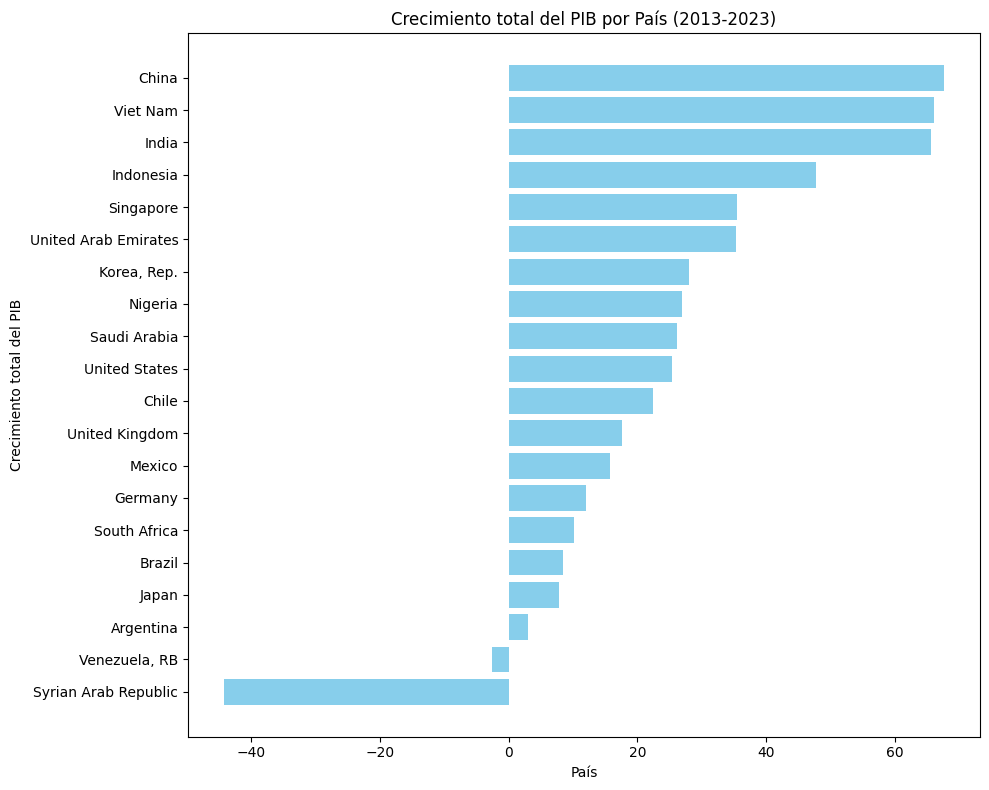

In [34]:
#Graficamos el crecimiento total del PIB por país

#Ordenamos el DataFrame por el crecimiento total del PIB
df_sql_plot8 = df_sql8.sort_values(by='Total GDP Growth', ascending=True)

#Creamos el gráfico de barras
plt.figure(figsize=(10,8))
plt.barh(df_sql_plot8['Country Name'], df_sql_plot8['Total GDP Growth'], color='skyblue')

#Etiqueteas y título
plt.title('Crecimiento total del PIB por País (2013-2023)')
plt.xlabel('País')
plt.ylabel('Crecimiento total del PIB')

#Mostramo el gráfico
plt.tight_layout()
plt.show()

Barras positivas: Países que han experimentado crecimiento acumulado del PIB durante los años analizados.

Barras negativas: Países que han experimentado una contracción económica acumulada.

Este gráfico permitirá comparar fácilmente qué países han crecido más y cuáles han tenido una contracción económica.